In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv"
data=pd.read_csv(path)

In [ ]:
x =data.iloc[:,:-1].values
y =data.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # 80% train 20% test

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print("Model Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Model Precision:", round(precision_score(y_test, y_pred),4))
print("Model Recall:", round(recall_score(y_test, y_pred),4))

Model Accuracy: 0.9983
Model Precision: 1.0
Model Recall: 0.0198


In [ ]:
labels= ['Valid', 'Fraud'] 
cm=confusion_matrix(y_test, y_pred)
cm

array([[56861,     0],
       [   99,     2]])

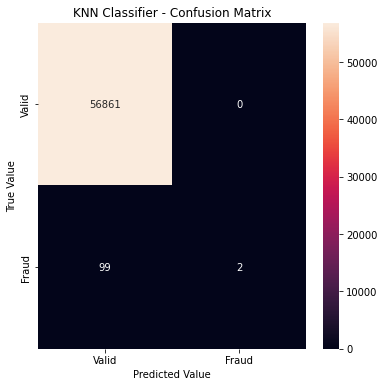

In [ ]:
plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("KNN Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()